## Part1: Histogram Equalization & Specification

(300, 451, 3)

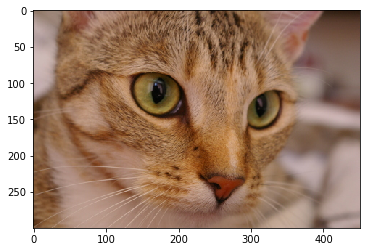

In [27]:
import os
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
# Loading an image to be used
from skimage import data
img=data.chelsea()
# img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray')
img.shape

In [28]:
# Flatten our image from two dimensional to one dimnension
img_1d=img.flatten()
# img_1d=img_1d/max(img_1d)
# Creating histogram
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

### Getting cumulative Density function of our histogram

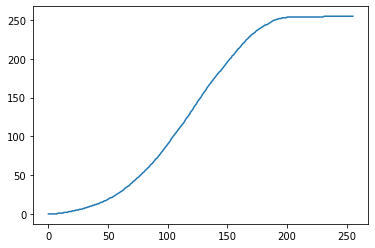

In [29]:
# execute the cumulative density function 
def get_cdf(image_hist):
    img_cdf =np.cumsum(img_hist)
# Normalizing our CDF
    cdf_max=max(img_cdf)
    cdf_min=min(img_cdf)
    img_cdf=((img_cdf-cdf_min)/(cdf_max-cdf_min))*255
    img_cdf=img_cdf.astype('uint8')
    return img_cdf
img_hist=get_histogram(img_1d,256)
img_cdf= get_cdf(img_hist)
plt.plot(img_cdf)
# cv2.plot(img_hist)


## Assigning values from our cumulative function to our flattened image

(<matplotlib.axes._subplots.AxesSubplot at 0x24aa95c9ac8>,
 Text(0.5, 1.0, 'Image after histogram equailization'))

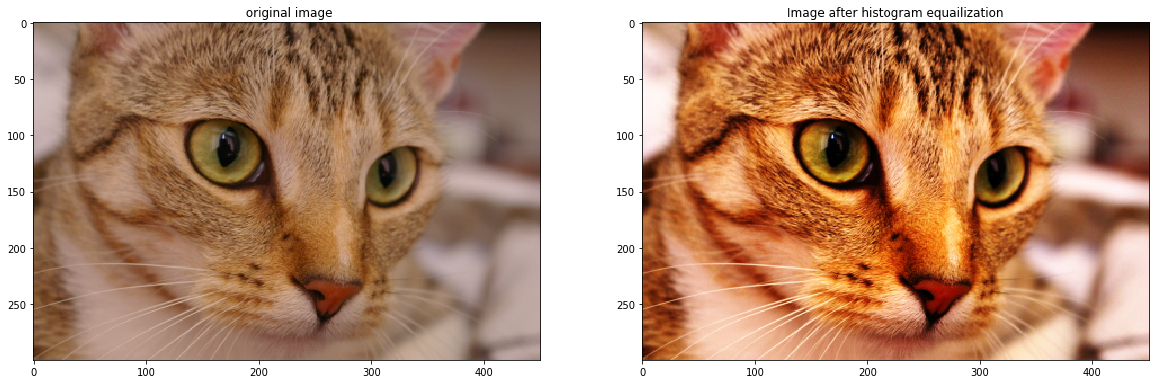

In [30]:

img_new=np.reshape(img_new,img.shape)
fig=plt.figure(figsize=(20,20))
fig.add_subplot(1,2,1),plt.imshow(img,cmap="gray"),plt.title(" original image")

fig.add_subplot(1,2,2),plt.imshow(img_new),plt.title("Image after histogram equailization")



### Part1-2: Histogram Specification

(512, 512, 3)

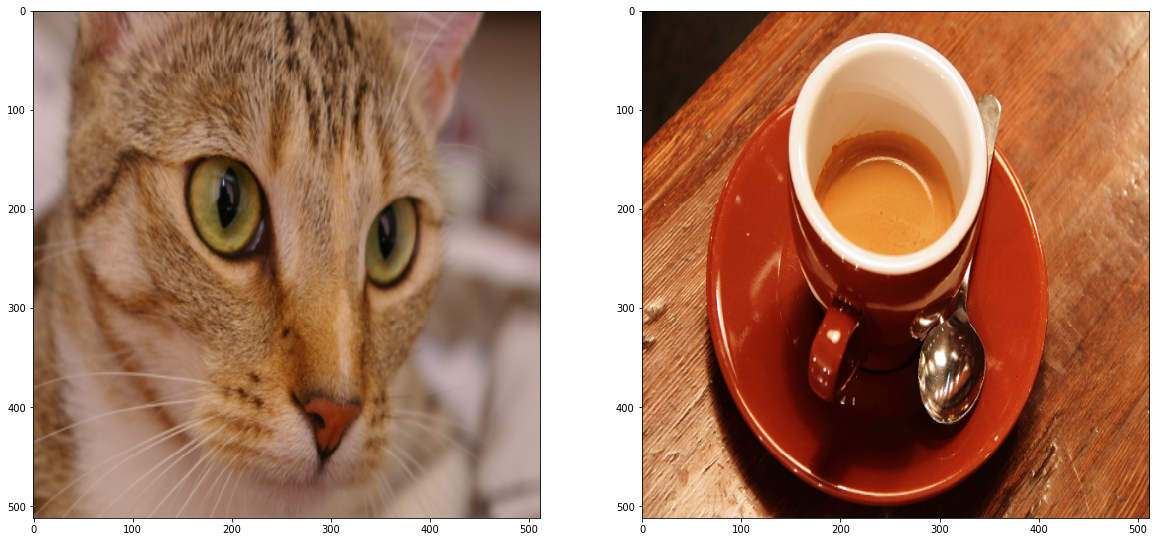

In [13]:
from skimage import data
## Loading two images with differrent contrast
img_high=data.coffee()
img_low=data.chelsea()
# img_high=cv2.cvtColor(img_high,cv2.COLOR_RGB2GRAY)
# img_low=cv2.cvtColor(img_low,cv2.COLOR_RGB2GRAY)

img_low=cv2.resize(img_low,(512,512))
img_high=cv2.resize(img_high,(512,512))
fig=plt.figure(figsize=(20,20))
fig.add_subplot(121)
plt.imshow(img_low,cmap='gray')
fig.add_subplot(122)
plt.imshow(img_high,cmap="gray")
img_high.shape

## Getting histograms of both images

In [31]:
img_high_1d=img_high.flatten()
img_low_1d= img_low.flatten()
## getting their corresponding histograms
img_high_hist=get_histogram(img_high_1d,256)
img_low_hist=get_histogram(img_low_1d,256)
## Getting CDFs
img_high_cdf=get_cdf(img_high_hist)
img_low_cdf=get_cdf(img_low_hist)
img_high_1d.shape

(786432,)

## Matching Histograms

(512, 512, 3)

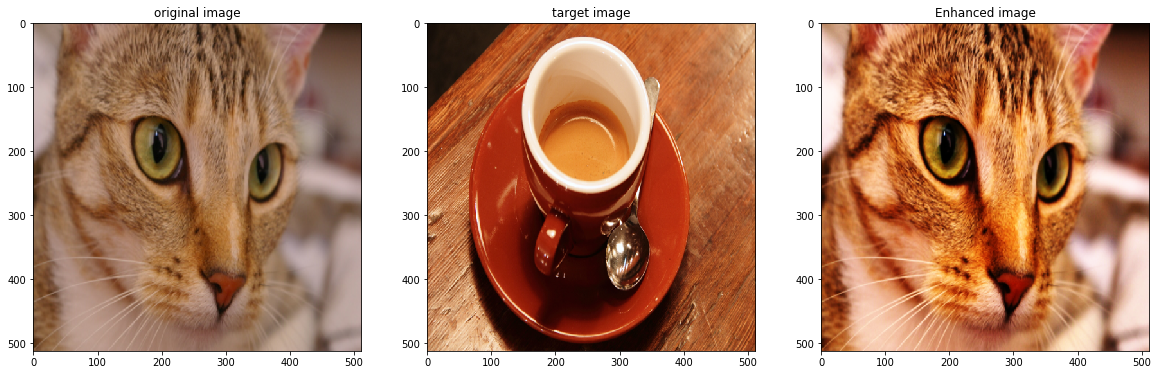

In [32]:
img_low_cdf=img_high_cdf
# histmap= img_high_cdf[img_low_cdf]
img_final=img_low_cdf[img_low_1d]
img_final= np.reshape(img_final,img_low.shape)
fig=plt.figure(figsize=(20,20))
fig.add_subplot(131),plt.imshow(img_low,cmap='gray'),plt.title("original image")
fig.add_subplot(132), plt.imshow(img_high,cmap="gray"),plt.title("target image")
fig.add_subplot(133),plt.imshow(img_final,cmap="gray"),plt.title("Enhanced image")
img_final.shape

## Local Histogram Equalization

In [33]:
from skimage import data
from skimage.util import img_as_ubyte
from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank
img=data.moon()
img1=cv2.imread("local3.png")
img1=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
img.shape

(512, 512)

## Local and Histogram equalization

(<matplotlib.axes._subplots.AxesSubplot at 0x24aa64eff48>,
 Text(0.5, 1.0, 'square kernel width=50'))

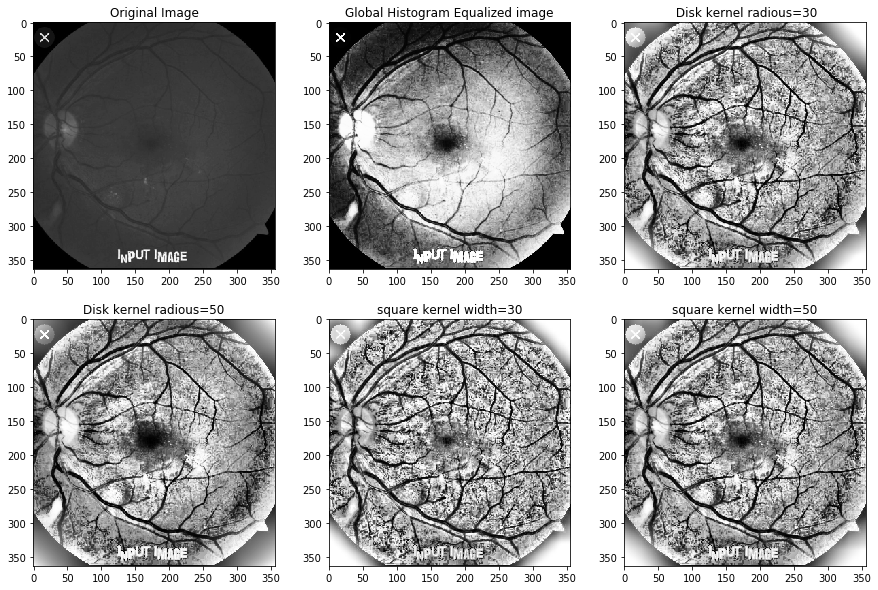

In [17]:
img_global = exposure.equalize_hist(img1)

### Local Histogram equalization with both square and disk shape kernel
kernel_square30 = np.ones((30,30))
kernel_disk30=morp.disk(30)
kernel_square50 = np.ones((50,50))
kernel_disk50=morp.disk(50)


img_local2 = rank.equalize(img1, selem=kernel_disk30)
img_local3 = rank.equalize(img1, selem=kernel_disk50)
img_local4 = rank.equalize(img1, selem=kernel_square30)
img_local5 = rank.equalize(img1, selem=kernel_square50)
fig=plt.figure(figsize=(15,10))
fig.add_subplot(231), plt.imshow(img1,cmap='gray'),plt.title("Original Image")
fig.add_subplot(232), plt.imshow(img_global,cmap='gray'),plt.title("Global Histogram Equalized image")
fig.add_subplot(233), plt.imshow(img_local2,cmap="gray"),plt.title(" Disk kernel radious=30")
fig.add_subplot(234), plt.imshow(img_local3,cmap='gray'),plt.title("Disk kernel radious=50")
fig.add_subplot(235), plt.imshow(img_local4,cmap='gray'),plt.title("square kernel width=30")
fig.add_subplot(236), plt.imshow(img_local5,cmap='gray'),plt.title("square kernel width=50")
